In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 数据集的准备
from sklearn import datasets
iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target

# 由于我们的逻辑回归解决的是二分类问题，所以我们值需要前两二分类的数据就可以啦
x = iris_x[iris_y<2, :2]
y = iris_y[iris_y < 2]

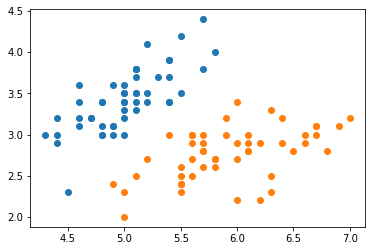

In [3]:
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [4]:
# 对我们的数据进行划分
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y)

In [5]:
# 定义我们sigmoid
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
# 定义我们的损失函数
def J(theta, x_b, y):
    y_hat = sigmoid(x_b.dot(theta))
    return -1/len(y) * np.sum((y * np.log(y_hat)) + ((1-y)*np.log(1-y_hat)))

$ \frac{1}{n}\sum_{i=1}^n(\bar{y}^{(i)}-y^{(i)})X_j^{(i)}$

In [7]:
# 定义我们的导数，前面我们已经用公式推导出来了
def dJ(theta, x_b, y):
    return x_b.T.dot(sigmoid(x_b.dot(theta)) - y) / len(y)

In [8]:
# 使用我们的梯度下降来求得最优解
def gradient_descent(theta, x_b, y):  
    # 利用我们的梯度下降来得到最佳的theta
    eta = 0.1 # 学习学率
    epsilon = 1e-8 # 相当于0的存在
    # 此时，我们的theta，应该是一个向量，不再是一个标量
    while True:
        gradient = dJ(theta, x_b, y)
        last_theta = theta
        theta = theta - eta * gradient # 进行迭代操作

        if abs(J(theta, x_b, y) - J(last_theta, x_b, y)) < epsilon:
            return theta  # 返回最佳的theta值
            break;

In [9]:
# 这在前面的线性回归中已经有涉及到了
x_b = np.hstack([ np.ones((len(train_x) ,1)),train_x])
initial_theta = np.zeros(x_b.shape[1])

In [10]:
theta = gradient_descent(initial_theta, x_b, train_y)

In [11]:
# 进行数据的预测
test_x_b = np.hstack([np.ones((len(test_x),1)), test_x])
y_predict = test_x_b.dot(theta)

In [12]:
y_predict   # 我们知道 > 0.5 为1， 小于0.5为0
# 这就与我们前面的decisipon_function会联系起来

array([ 19.94196782,  23.12062209,  13.27560128,  -7.65607724,
        -9.05224314,  11.4931129 ,  16.60878455,  -6.88343227,
         8.54625212,  -4.09110048,  13.27560128, -10.52567353,
       -13.8588568 ,  15.28988315,  -7.50154825, -12.6172199 ,
       -10.52567353,  25.05763947,  13.04380778, -11.84457492,
        -7.42428375,  13.04380778,   9.94241801,  21.7244562 ,
         4.98127535])

In [21]:
predict_y = np.array(y_predict>=0.5, dtype='int')
predict_y

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1])

In [44]:
test_y

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1])

In [45]:
test_y.shape[0]

25

In [49]:
print("准确率为:%.3f"%(len(test_y[np.where(test_y == predict_y)]) / test_y.shape[0]))

准确率为:0.960


In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)

print("先关注一下决策函数的值，后面我们在进行精准和召回率调节的时候会用到")
print(log_reg.decision_function(test_x))
# 我们也设置 >= 0.5 为1，否则为0
print("sklearn中逻辑回归预测结果为：", np.array(log_reg.decision_function(test_x) >= 0.5, dtype='int'))

先关注一下决策函数的值，后面我们在进行精准和召回率调节的时候会用到
[ 3.32678276  3.87069809  2.14758597 -1.46780906 -1.68266289  1.81852447
  2.73718436 -1.23939373  1.34313373 -0.80968606  2.14758597 -1.92035826
 -2.50995666  2.54517206 -1.42212599 -2.34078589 -1.92035826  4.24544266
  2.07906137 -2.11237056 -1.39928446  2.07906137  1.55798757  3.65584426
  0.68501074]
sklearn中逻辑回归预测结果为： [1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1]


In [60]:
print("准确率为:%.3f"%(len(test_y[np.where(test_y == np.array(log_reg.decision_function(test_x) >= 0.5, dtype='int'))]) / test_y.shape[0]))

准确率为:1.000


上述可以自行比较一下